In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
raw_data = pd.read_csv("Absenteeism_data.csv")
raw_data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [3]:
print(raw_data.shape)

(700, 12)


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [5]:
raw_data.describe()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,17.951429,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,11.028144,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,1.000000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,18.000000,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,28.000000,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,36.000000,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


In [6]:
raw_data.columns

Index(['ID', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours'],
      dtype='object')

In [7]:
raw_data.ID.nunique()

34

In [8]:
# is there any no absence row?
no_absence = raw_data[raw_data["Absenteeism Time in Hours"] == 0]
no_absence.shape

(39, 12)

In [9]:
# Sorting the cumilative and average absens time per each id (employe)
abs_time = raw_data.groupby('ID')['Absenteeism Time in Hours'].sum().sort_values(ascending = True)
abs_time_average = raw_data.groupby('ID')['Absenteeism Time in Hours'].mean().sort_values(ascending = True)
print(abs_time)
print(abs_time_average)

ID
8       0
19      6
16      8
12     13
21     16
32     16
31     16
29     21
2      25
27     27
7      30
30     31
23     32
25     42
6      56
33     73
26     83
5     100
13    103
1     117
18    118
17    118
9     134
10    170
22    241
15    251
24    254
36    284
20    306
34    314
28    338
11    442
14    466
3     482
Name: Absenteeism Time in Hours, dtype: int64
ID
8      0.000000
19     2.000000
33     3.041667
32     3.200000
27     3.857143
25     4.200000
29     4.200000
3      4.265487
12     4.333333
30     4.428571
28     4.567568
23     4.571429
2      5.000000
7      5.000000
1      5.318182
31     5.333333
5      5.555556
22     5.878049
17     6.210526
34     6.541667
15     6.972222
20     7.285714
13     7.357143
18     7.375000
10     7.727273
21     8.000000
16     8.000000
6      8.000000
24     8.466667
36     8.875000
11    11.333333
26    16.600000
14    17.259259
9     22.333333
Name: Absenteeism Time in Hours, dtype: float64


In [10]:
#For how many reasons people get absent?
raw_data['Reason for Absence'].nunique()

28

In [11]:
df = raw_data.copy()

def date_to_day(date):
    date_time_obj = datetime.strptime(date, '%d/%m/%Y')
    return date_time_obj.weekday()


df['week_day'] = df['Date'].apply(lambda x: date_to_day(x) )

In [12]:
def date_to_month(date):
    date_time_obj = datetime.strptime(date, '%d/%m/%Y')
    month = date_time_obj.month
    return month


df['month_num'] = df['Date'].apply(lambda x: date_to_month(x) )

In [13]:
print(df['week_day'].nunique())
print(df['month_num'].nunique())

7
12


In [14]:
pd.set_option('display.max_columns', None)
df.head(20)

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,week_day,month_num
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4,1,7
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,1,7
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2,2,7
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,3,7
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2,3,7
5,3,23,10/07/2015,179,51,38,239.554,31,1,0,0,2,4,7
6,10,22,17/07/2015,361,52,28,239.554,27,1,1,4,8,4,7
7,20,23,24/07/2015,260,50,36,239.554,23,1,4,0,4,4,7
8,14,19,06/07/2015,155,12,34,239.554,25,1,2,0,40,0,7
9,1,22,13/07/2015,235,11,37,239.554,29,3,1,1,8,0,7


In [15]:
def categorizing_absence_reasons(reason):
    if  (1<= reason <= 14) :
        reason = 1
    elif (15 <=reason <= 17):
        reason = 2
    elif (18 <= reason <= 21):
        reason = 3
    elif (reason > 21):
        reason = 4
    elif (reason == 0):
        reason = 5
    return reason



df['Absence_reason'] = df['Reason for Absence'].apply(lambda x: categorizing_absence_reasons(x) ) 

In [16]:
df['Absence_reason'].value_counts()

4    418
1    175
3     63
5     38
2      6
Name: Absence_reason, dtype: int64

In [17]:
df =pd.get_dummies(df,columns= ['Absence_reason'])

In [18]:
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,week_day,month_num,Absence_reason_1,Absence_reason_2,Absence_reason_3,Absence_reason_4,Absence_reason_5
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4,1,7,0,0,0,1,0
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,1,7,0,0,0,0,1
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2,2,7,0,0,0,1,0
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,3,7,1,0,0,0,0
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2,3,7,0,0,0,1,0


In [19]:
df.columns.values

array(['ID', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours', 'week_day', 'month_num',
       'Absence_reason_1', 'Absence_reason_2', 'Absence_reason_3',
       'Absence_reason_4', 'Absence_reason_5'], dtype=object)

In [20]:
df.shape

(700, 19)

In [21]:
#Check if we have any unfilled row or absence with 2 
#reasons in absence resons columns
df.iloc[:,-5:].max(axis =1).sum(axis = 0)
#as the answer is 700 (the lenght of the dataset)
#we do not have any problem with it

700

In [22]:
df['Age'].describe()

count    700.000000
mean      36.417143
std        6.379083
min       27.000000
25%       31.000000
50%       37.000000
75%       40.000000
max       58.000000
Name: Age, dtype: float64

In [23]:
# How many education levels do we have?
df['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

In [24]:
df['Education'].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

### Education levels:
#### 1 : high school
#### 2 : graduate
#### 3 : postgraduate
#### 4 : master's / PhD
#### As they are categorical variables we can convert them to dummies by categorizing them into 2 groups. the first one is the high school level because they are almost 65 percent of the dataset and with label 0 and the label 1 presents the 3 other groups


In [25]:
df['Education'] = df['Education'].map({1:0 , 2:1 ,3:1 ,4:1})

In [26]:
df['Education'].unique()

array([0, 1], dtype=int64)

In [27]:
df['Education'].value_counts()

0    583
1    117
Name: Education, dtype: int64

In [28]:
df['Absenteeism Time in Hours'].describe()

count    700.000000
mean       6.761429
std       12.670082
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism Time in Hours, dtype: float64

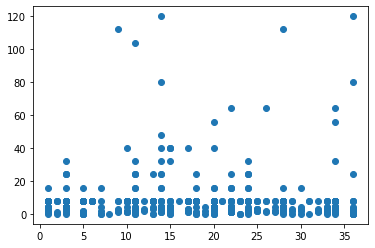

In [29]:
plt.scatter(df.ID,df['Absenteeism Time in Hours'])

In [30]:
def absence(hours):
    if hours <= df['Absenteeism Time in Hours'].median():
        hours = 0 # moderate absence
    else:
        hours = 1 # extreme absence
    return hours

        
df['Absence'] = df['Absenteeism Time in Hours'].apply(lambda x: absence(x))

In [31]:
df_clean = df.drop(columns =['Date', 'ID','Absenteeism Time in Hours','Reason for Absence',])

In [32]:
#Checkpoint
df_preprocessed = df_clean.copy()
df_preprocessed

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,week_day,month_num,Absence_reason_1,Absence_reason_2,Absence_reason_3,Absence_reason_4,Absence_reason_5,Absence
0,289,36,33,239.554,30,0,2,1,1,7,0,0,0,1,0,1
1,118,13,50,239.554,31,0,1,0,1,7,0,0,0,0,1,0
2,179,51,38,239.554,31,0,0,0,2,7,0,0,0,1,0,0
3,279,5,39,239.554,24,0,2,0,3,7,1,0,0,0,0,1
4,289,36,33,239.554,30,0,2,1,3,7,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,179,22,40,237.656,22,1,2,0,2,5,1,0,0,0,0,1
696,225,26,28,237.656,24,0,1,2,2,5,1,0,0,0,0,0
697,330,16,28,237.656,25,1,0,0,3,5,1,0,0,0,0,1
698,235,16,32,237.656,25,1,0,0,3,5,0,0,0,1,0,0


In [33]:
unscaled_inputs = df_preprocessed.iloc[:,:-1]

In [34]:
df_preprocessed.to_csv('df_preprocessed.csv', index = False)

## Standardizing

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

# create the Custom Scaler class

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    def __init__(self,columns):
        
        # scaler is a Standard Scaler object
        self.scaler = StandardScaler()
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    
    # the fit method, which, based on StandardScale
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling

    def transform(self, X, y=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [36]:
unscaled_inputs.columns.values

array(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'week_day', 'month_num', 'Absence_reason_1',
       'Absence_reason_2', 'Absence_reason_3', 'Absence_reason_4',
       'Absence_reason_5'], dtype=object)

In [37]:
columns_to_scale = ['Transportation Expense', 'Distance to Work', 'Age', 'Daily Work Load Average', 
                    'Body Mass Index','Children', 'Pets', 'week_day', 'month_num']

In [38]:
abs_scaler = CustomScaler(columns_to_scale)

In [39]:
abs_scaler.fit(unscaled_inputs)

CustomScaler(columns=['Transportation Expense', 'Distance to Work', 'Age',
                      'Daily Work Load Average', 'Body Mass Index', 'Children',
                      'Pets', 'week_day', 'month_num'])

In [40]:
scaled_inputs = abs_scaler.transform(unscaled_inputs)

In [41]:
scaled_inputs

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,week_day,month_num,Absence_reason_1,Absence_reason_2,Absence_reason_3,Absence_reason_4,Absence_reason_5
0,1.005844,0.412816,-0.536062,-0.806331,0.767431,0,0.880469,0.268487,-0.683704,0.182726,0,0,0,1,0
1,-1.574681,-1.141882,2.130803,-0.806331,1.002633,0,-0.019280,-0.589690,-0.683704,0.182726,0,0,0,0,1
2,-0.654143,1.426749,0.248310,-0.806331,1.002633,0,-0.919030,-0.589690,-0.007725,0.182726,0,0,0,1,0
3,0.854936,-1.682647,0.405184,-0.806331,-0.643782,0,0.880469,-0.589690,0.668253,0.182726,1,0,0,0,0
4,1.005844,0.412816,-0.536062,-0.806331,0.767431,0,0.880469,0.268487,0.668253,0.182726,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-0.654143,-0.533522,0.562059,-0.853789,-1.114186,1,0.880469,-0.589690,-0.007725,-0.388293,1,0,0,0,0
696,0.040034,-0.263140,-1.320435,-0.853789,-0.643782,0,-0.019280,1.126663,-0.007725,-0.388293,1,0,0,0,0
697,1.624567,-0.939096,-1.320435,-0.853789,-0.408580,1,-0.919030,-0.589690,0.668253,-0.388293,1,0,0,0,0
698,0.190942,-0.939096,-0.692937,-0.853789,-0.408580,1,-0.919030,-0.589690,0.668253,-0.388293,0,0,0,1,0


In [42]:
scaled_inputs.shape

(700, 15)

In [43]:
abs_new_data = pd.concat([scaled_inputs,df.iloc[:,-1]],axis = 1)
abs_new_data.to_csv('final_abs_data.csv', index = False)

In [44]:
abs_new_data

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,week_day,month_num,Absence_reason_1,Absence_reason_2,Absence_reason_3,Absence_reason_4,Absence_reason_5,Absence
0,1.005844,0.412816,-0.536062,-0.806331,0.767431,0,0.880469,0.268487,-0.683704,0.182726,0,0,0,1,0,1
1,-1.574681,-1.141882,2.130803,-0.806331,1.002633,0,-0.019280,-0.589690,-0.683704,0.182726,0,0,0,0,1,0
2,-0.654143,1.426749,0.248310,-0.806331,1.002633,0,-0.919030,-0.589690,-0.007725,0.182726,0,0,0,1,0,0
3,0.854936,-1.682647,0.405184,-0.806331,-0.643782,0,0.880469,-0.589690,0.668253,0.182726,1,0,0,0,0,1
4,1.005844,0.412816,-0.536062,-0.806331,0.767431,0,0.880469,0.268487,0.668253,0.182726,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-0.654143,-0.533522,0.562059,-0.853789,-1.114186,1,0.880469,-0.589690,-0.007725,-0.388293,1,0,0,0,0,1
696,0.040034,-0.263140,-1.320435,-0.853789,-0.643782,0,-0.019280,1.126663,-0.007725,-0.388293,1,0,0,0,0,0
697,1.624567,-0.939096,-1.320435,-0.853789,-0.408580,1,-0.919030,-0.589690,0.668253,-0.388293,1,0,0,0,0,1
698,0.190942,-0.939096,-0.692937,-0.853789,-0.408580,1,-0.919030,-0.589690,0.668253,-0.388293,0,0,0,1,0,0


## Splitting data

In [45]:
from sklearn.model_selection import train_test_split
X = scaled_inputs
y = df_preprocessed['Absence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [46]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(560, 15) (560,)
(140, 15) (140,)


## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

In [48]:
reg = LogisticRegression(max_iter=10000)
reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [49]:
reg.score(X_train, y_train)

0.7875

## Testing the model

In [50]:
y_pred = reg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(reg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [51]:
#testing the model on new data
df_new = pd.read_csv("Absenteeism_new_data.csv")

In [52]:
pred_proba = reg.predict_proba(X_test)
pred_proba

array([[0.73650154, 0.26349846],
       [0.58873461, 0.41126539],
       [0.3706825 , 0.6293175 ],
       [0.81112461, 0.18887539],
       [0.06499716, 0.93500284],
       [0.31612253, 0.68387747],
       [0.30214527, 0.69785473],
       [0.10482695, 0.89517305],
       [0.79959378, 0.20040622],
       [0.75711107, 0.24288893],
       [0.46040502, 0.53959498],
       [0.16430979, 0.83569021],
       [0.06075014, 0.93924986],
       [0.71247014, 0.28752986],
       [0.27416143, 0.72583857],
       [0.55143145, 0.44856855],
       [0.52703947, 0.47296053],
       [0.54995248, 0.45004752],
       [0.38143592, 0.61856408],
       [0.03441978, 0.96558022],
       [0.69001737, 0.30998263],
       [0.80284588, 0.19715412],
       [0.3823083 , 0.6176917 ],
       [0.40770821, 0.59229179],
       [0.22798115, 0.77201885],
       [0.75232601, 0.24767399],
       [0.47946634, 0.52053366],
       [0.88061997, 0.11938003],
       [0.17042926, 0.82957074],
       [0.79429629, 0.20570371],
       [0.

In [53]:
# The left column is the probability of getting 0 and
#The right one is 1. as we want the probability of 
# getting excesive absenteeism the right one is what we need   

In [54]:
pred_proba.shape

(140, 2)

In [55]:
pred_proba[:,1]

array([0.26349846, 0.41126539, 0.6293175 , 0.18887539, 0.93500284,
       0.68387747, 0.69785473, 0.89517305, 0.20040622, 0.24288893,
       0.53959498, 0.83569021, 0.93924986, 0.28752986, 0.72583857,
       0.44856855, 0.47296053, 0.45004752, 0.61856408, 0.96558022,
       0.30998263, 0.19715412, 0.6176917 , 0.59229179, 0.77201885,
       0.24767399, 0.52053366, 0.11938003, 0.82957074, 0.20570371,
       0.38444289, 0.70030468, 0.69875807, 0.56600359, 0.19715412,
       0.53666114, 0.20826099, 0.77949815, 0.44999377, 0.60759709,
       0.21530016, 0.41392253, 0.21826413, 0.14279827, 0.83583674,
       0.60646461, 0.70512873, 0.2747494 , 0.20133614, 0.17455452,
       0.58387841, 0.12376955, 0.67512318, 0.28941038, 0.86583235,
       0.48973392, 0.91215461, 0.25222868, 0.11694671, 0.11661473,
       0.7283197 , 0.66148722, 0.31675239, 0.82313133, 0.19188243,
       0.26297324, 0.02032243, 0.22705389, 0.76482737, 0.33277239,
       0.20893839, 0.10412879, 0.92693116, 0.463661  , 0.65001

## Intercept and coefficients

In [56]:
reg.intercept_

array([-0.18960725])

In [57]:
reg.coef_

array([[ 0.6784547 , -0.0321576 , -0.18588054,  0.0042807 ,  0.30719109,
        -0.28419626,  0.3802874 , -0.31229496, -0.07863751,  0.18585703,
         1.4311202 ,  0.15986666,  1.86574619, -0.58523397, -2.87168173]])

In [58]:
features = unscaled_inputs.columns.values

In [59]:
summary_table = pd.DataFrame(columns = ['features_name'], data = features)

In [60]:
summary_table

,features_name
0,Transportation Expense
1,Distance to Work
2,Age
3,Daily Work Load Average
4,Body Mass Index
5,Education
6,Children
7,Pets
8,week_day
9,month_num


In [61]:
# Adding coef to the summary table
summary_table['Coefficient'] = np.transpose(reg.coef_)

In [62]:
summary_table

,features_name,Coefficient
0,Transportation Expense,0.678455
1,Distance to Work,-0.032158
2,Age,-0.185881
3,Daily Work Load Average,0.004281
4,Body Mass Index,0.307191
5,Education,-0.284196
6,Children,0.380287
7,Pets,-0.312295
8,week_day,-0.078638
9,month_num,0.185857


In [63]:
summary_table.index = summary_table.index + 1

In [64]:
summary_table.loc[0] = ['intercept', reg.intercept_[0]]

In [65]:
summary_table.sort_index()

,features_name,Coefficient
0,intercept,-0.189607
1,Transportation Expense,0.678455
2,Distance to Work,-0.032158
3,Age,-0.185881
4,Daily Work Load Average,0.004281
5,Body Mass Index,0.307191
6,Education,-0.284196
7,Children,0.380287
8,Pets,-0.312295
9,week_day,-0.078638


In [66]:
#add log
summary_table['coef_ratio'] = np.exp(summary_table['Coefficient'])

In [67]:
summary_table.sort_values('coef_ratio', ascending = False)

,features_name,Coefficient,coef_ratio
13,Absence_reason_3,1.865746,6.460755
11,Absence_reason_1,1.431120,4.183383
1,Transportation Expense,0.678455,1.970830
7,Children,0.380287,1.462705
5,Body Mass Index,0.307191,1.359601
10,month_num,0.185857,1.204250
12,Absence_reason_2,0.159867,1.173354
4,Daily Work Load Average,0.004281,1.004290
2,Distance to Work,-0.032158,0.968354
9,week_day,-0.078638,0.924375


## Saving the model

In [68]:
import pickle

In [69]:
with open('model','wb') as file:
    pickle.dump(reg, file)

In [70]:
with open('scaler','wb') as file:
    pickle.dump(abs_scaler, file)